# ***Bibliotecas***

In [108]:
%matplotlib inline
import numpy  as np
import pandas as pd
import string
import warnings
import matplotlib.dates as mdates
import datetime
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
import pandas_datareader.data as web
import statsmodels.api as sm
import math
import seaborn as sns

from pandas.plotting import scatter_matrix
from datetime import date
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.ticker import StrMethodFormatter
from sklearn.pipeline import make_pipeline
from pandas_datareader import data
from sklearn.cluster import KMeans
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from pandas.util.testing import assert_frame_equal
from scipy import stats
from matplotlib import style

# Opções de Gráfico

plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='Times New Roman', size=15)
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'cm'
plt.rcParams['axes.grid'] = True
kw_save = dict(bbox_iches='tight', transparent=True)

# <u>***Análise por Setor***</u>

In [ ]:
varejo      = ['BTOW3.SA', 'LAME3.SA', 'MGLU3.SA', 'VVAR3.SA', 'AMAR3.SA', 'ARZZ3.SA',  'CEAB3.SA', 'CNTO3.SA' , 'LLIS3.SA', 'LREN3.SA']

construtora = ['MRVE3.SA', 'TRIS3.SA', 'DIRR3.SA', 'EZTC3.SA', 'TEND3.SA', 'CYRE3.SA', 'HBOR3.SA', 'JHSF3.SA', 'EVEN3.SA', 'JFEN3.SA']

financeiro  = ['BPAC11.SA', 'BPAN4.SA', 'ITSA4.SA', 'BBAS3.SA', 'BBDC4.SA', 'ITUB4.SA', 'BMGB4.SA', 'SANB11.SA', 'BIDI4.SA', 'B3SA3.SA']

saude       = ['FLRY3.SA', 'GNDI3.SA', 'HAPV3.SA', 'QUAL3.SA', 'RADL3.SA', 'ADHM3.SA', 'HYPE3.SA', 'PARD3.SA', 'ODPV3.SA', 'PNVL4.SA', 'AALR3.SA']

alimentos   = ['BEEF3.SA', 'CAML3.SA', 'BRFS3.SA', 'JBSS3.SA', 'MDIA3.SA', 'MRFG3.SA', 'SMTO3.SA', 'BSEV3.SA', 'SLCE3.SA', 'ABEV3.SA']

energia     = ['EGIE3.SA', 'ENEV3.SA', 'EQTL3.SA', 'OMGE3.SA', 'TIET11.SA', 'ALUP11.SA', 'CEBR3.SA', 'CMIG3.SA', 'CESP6.SA', 'CPFE3.SA', 'ELET3.SA', 'LIGT3.SA', 'NEOE3.SA', 'TAEE11.SA']

tecnologia  = ['LINX3.SA', 'SQIA3.SA', 'TOTS3.SA', 'POSI3.SA', 'LWSA3.SA']

materiais   = ['BRKM3.SA', 'CSNA3.SA', 'DTEX3.SA', 'FESA3.SA', 'GGBR4.SA', 'SUZB3.SA', 'UNIP6.SA', 'USIM3.SA', 'VALE3.SA', 'PETR3.SA', 'PRIO3.SA', 'UGPA3.SA', 'ENAT3.SA', 'DMMO3.SA', 'CSAN3.SA']

diversos    = ['WEGE3.SA', 'B3SA3.SA', 'MGLU3.SA', 'BPAC11.SA', 'JHSF3.SA', 'ENEV3.SA', 'LWSA3.SA']

tickers     = ['BTOW3.SA', 'LAME3.SA', 'LREN3.SA', 'MGLU3.SA', 'VVAR3.SA', 'TRIS3.SA', 'BPAC11.SA', 'BPAN4.SA', 'GNDI3.SA', 'CAML3.SA', 'EGIE3.SA', 'TIET11.SA', 'ENEV3.SA', 'SQIA3.SA', 'WEGE3.SA', 'B3SA3.SA', 'JHSF3.SA', 'LWSA3.SA', 'VALE3.SA']

todos = ['BTOW3.SA', 'LAME3.SA', 'MGLU3.SA', 'VVAR3.SA', 'MRVE3.SA', 'CYRE3.SA', 'BPAC11.SA', 'BPAN4.SA', 'ITSA4.SA', 'BBAS3.SA', 'BBDC4.SA', 'GNDI3.SA', 'RADL3.SA',
         'CAML3.SA', 'JBSS3.SA', 'ABEV3.SA', 'EGIE3.SA', 'ELET3.SA', 'LWSA3.SA', 'TOTS3.SA',  'VALE3.SA', 'CSNA3.SA', 'WEGE3.SA', 'B3SA3.SA', '^BVSP']

# <u>***Varejo***</u>

In [110]:
listOfReturns  = []
listOfRisks    = []
listOfVaRs     = []
varejo_returns = pd.Series(dtype='float64')
varejo_risk    = pd.Series(dtype='float64')
varejo_VaR     = pd.Series(dtype='float64')
VAREJO         = varejo + ['BOVA11.SA']

for i in range(len(VAREJO)):
    data    = yf.download(VAREJO[i], start='2020-03-27')
    data.ffill(inplace=True)
    
    returns           = np.log(data['Adj Close']).shift(-1) - np.log(data['Adj Close'])
    annual_returns    = ((1+np.mean(returns))**len(data['Adj Close']))-1
    dictionary_return = {VAREJO[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data['Adj Close']))
    dictionary_risk   = {VAREJO[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)
    
    var_95            = norm.ppf(1-0.99, np.mean(returns), np.std(returns))
    dictionary_var    = {VAREJO[i] : var_95}
    series_var        = pd.Series(dictionary_var)
    listOfVaRs.append(series_var)
    
varejo_returns = varejo_returns.append(listOfReturns)
varejo_risk    = varejo_risk.append(listOfRisks)
varejo_VaR     = varejo_VaR.append(listOfVaRs)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [111]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-27,71.150002,73.040001,70.220001,70.220001,70.220001,15518420
2020-03-30,71.019997,72.480003,70.540001,72.000000,72.000000,8414090
2020-03-31,71.510002,72.760002,69.349998,69.349998,69.349998,14177570
2020-04-01,67.769997,68.980003,67.010002,68.180000,68.180000,14579010
2020-04-02,69.330002,71.300003,68.480003,69.629997,69.629997,11802180
...,...,...,...,...,...,...
2020-12-04,108.800003,109.599998,108.750000,109.430000,109.430000,8513160
2020-12-07,109.410004,110.230003,109.230003,109.980003,109.980003,4127780
2020-12-08,108.989998,110.080002,108.519997,109.250000,109.250000,4414815


### Retornos

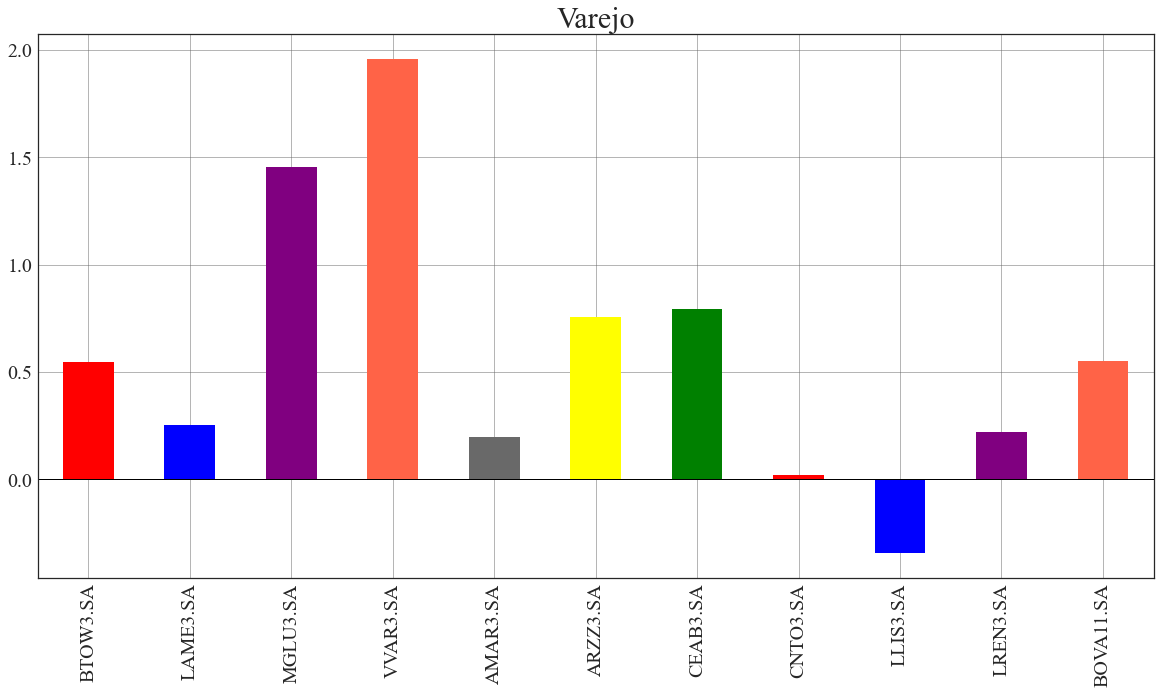

In [112]:
varejo_returns.plot.bar(figsize=(20,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Varejo', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### VAR

In [113]:
varejo_VaR.sort_values()

CEAB3.SA    -0.103620
LLIS3.SA    -0.100910
AMAR3.SA    -0.097084
VVAR3.SA    -0.096929
BTOW3.SA    -0.094211
CNTO3.SA    -0.093230
LREN3.SA    -0.074894
ARZZ3.SA    -0.073008
LAME3.SA    -0.068193
MGLU3.SA    -0.063092
BOVA11.SA   -0.038966
dtype: float64

# Risco X Retorno

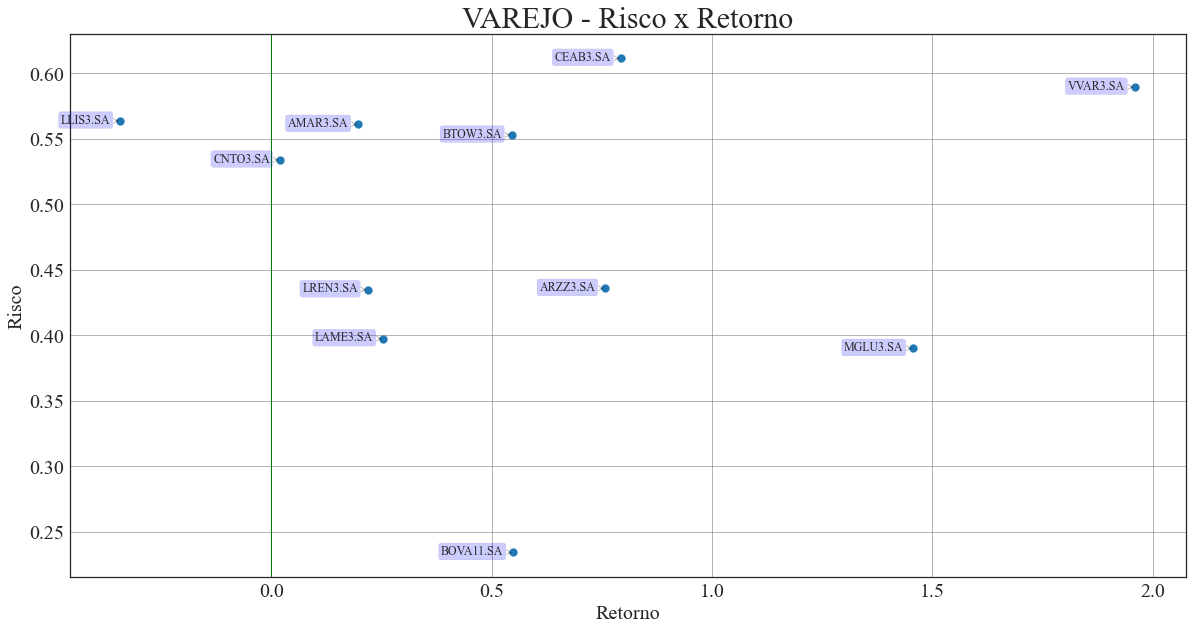

In [114]:
plt.subplots(figsize=(20,10))
plt.title('VAREJO - Risco x Retorno', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(varejo_returns, varejo_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='green')

for label, x, y in zip(varejo_returns.index, varejo_returns, varejo_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-10, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.2', fc = 'blue', alpha = 0.2),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# BETA

In [115]:
# DOWNLOAD DOS DADOS DE PREÇO

VAREJO      = varejo + ['BOVA11.SA']
data        = yf.download(VAREJO, start='2020-03-27')['Adj Close']

# CÁLCULO DOS RETORNOS DIÁRIOS

retornos    = np.log(data) / np.log(data.shift(1)) - 1
retornos    = retornos.fillna(0)

# CÁLCULO DO BETA

var_bench   = retornos['BOVA11.SA'].var()
covariancia = retornos.cov()['BOVA11.SA']
beta_capm   = covariancia / var_bench
beta        = pd.Series(beta_capm)

[*********************100%***********************]  11 of 11 completed


In [116]:
beta.sort_values()

BOVA11.SA    1.000000
BTOW3.SA     1.056137
MGLU3.SA     1.125173
ARZZ3.SA     1.149202
LAME3.SA     1.443080
LREN3.SA     1.538225
CNTO3.SA     1.812354
AMAR3.SA     2.751224
VVAR3.SA     2.809548
LLIS3.SA     3.058100
CEAB3.SA     3.115180
Name: BOVA11.SA, dtype: float64

[*********************100%***********************]  10 of 10 completed
Ativos com Melhor Relação em Cada Cluster: ['VVAR3.SA', 'MGLU3.SA', 'BTOW3.SA']


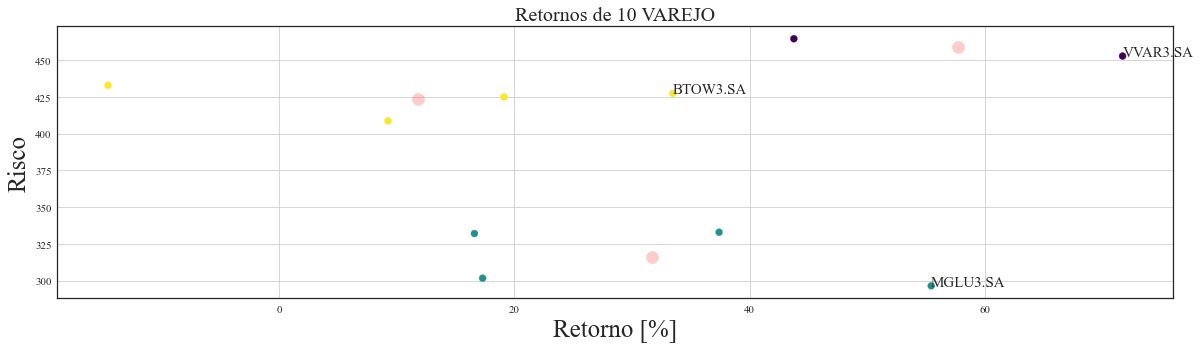

In [117]:
VAREJO   = varejo 
data     = yf.download(VAREJO, start='2020-03-27')['Adj Close']

output   = data
retornos = 100*output.pct_change()
stocks   = retornos.columns
X        = 100*np.array([[np.mean(retornos[sto]),np.std(retornos[sto])] for sto in stocks])
N        = 3
kmeans   = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))
ax1 = plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' VAREJO',fontsize=20)
ax1.set_xlabel('Retorno [%]',fontsize=25)
ax1.set_ylabel('Risco',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)

### Correlação

[*********************100%***********************]  10 of 10 completed


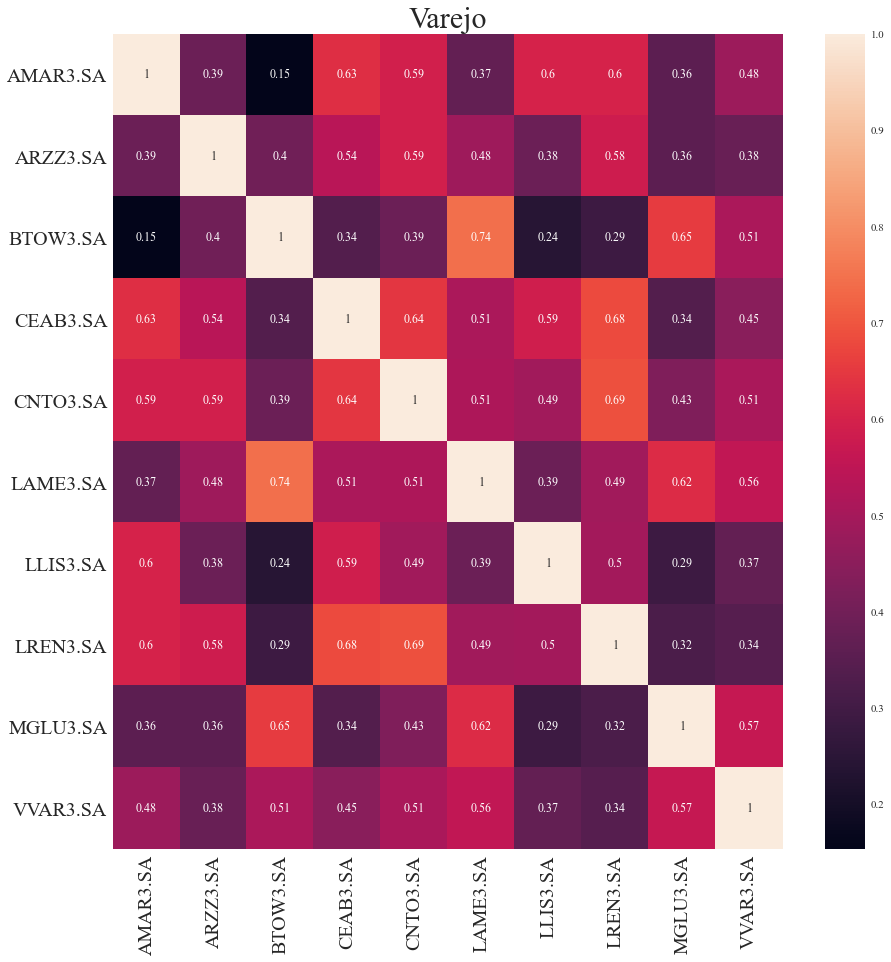

In [118]:
data    = yf.download(varejo, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
varejo_daily_returns = np.log(data) / np.log(data.shift(1)) - 1

plt.subplots(figsize=(15,15))
plt.title('Varejo', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(varejo_daily_returns.corr(), annot=True)

# <u>***Financeiro***</u>

In [119]:
listOfReturns  = []
listOfRisks    = []
listOfVaRs     = []
financeiro_returns = pd.Series(dtype='float64')
financeiro_risk    = pd.Series(dtype='float64')
financeiro_VaR     = pd.Series(dtype='float64')

for i in range(len(financeiro)):
    data    = yf.download(financeiro[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {financeiro[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {financeiro[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)
    
    var_95            = norm.ppf(1-0.99, np.mean(returns), np.std(returns))
    dictionary_var    = {financeiro[i] : var_95}
    series_var        = pd.Series(dictionary_var)
    listOfVaRs.append(series_var)

financeiro_returns = financeiro_returns.append(listOfReturns)
financeiro_risk    = financeiro_risk.append(listOfRisks)
financeiro_VaR     = financeiro_VaR.append(listOfVaRs)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

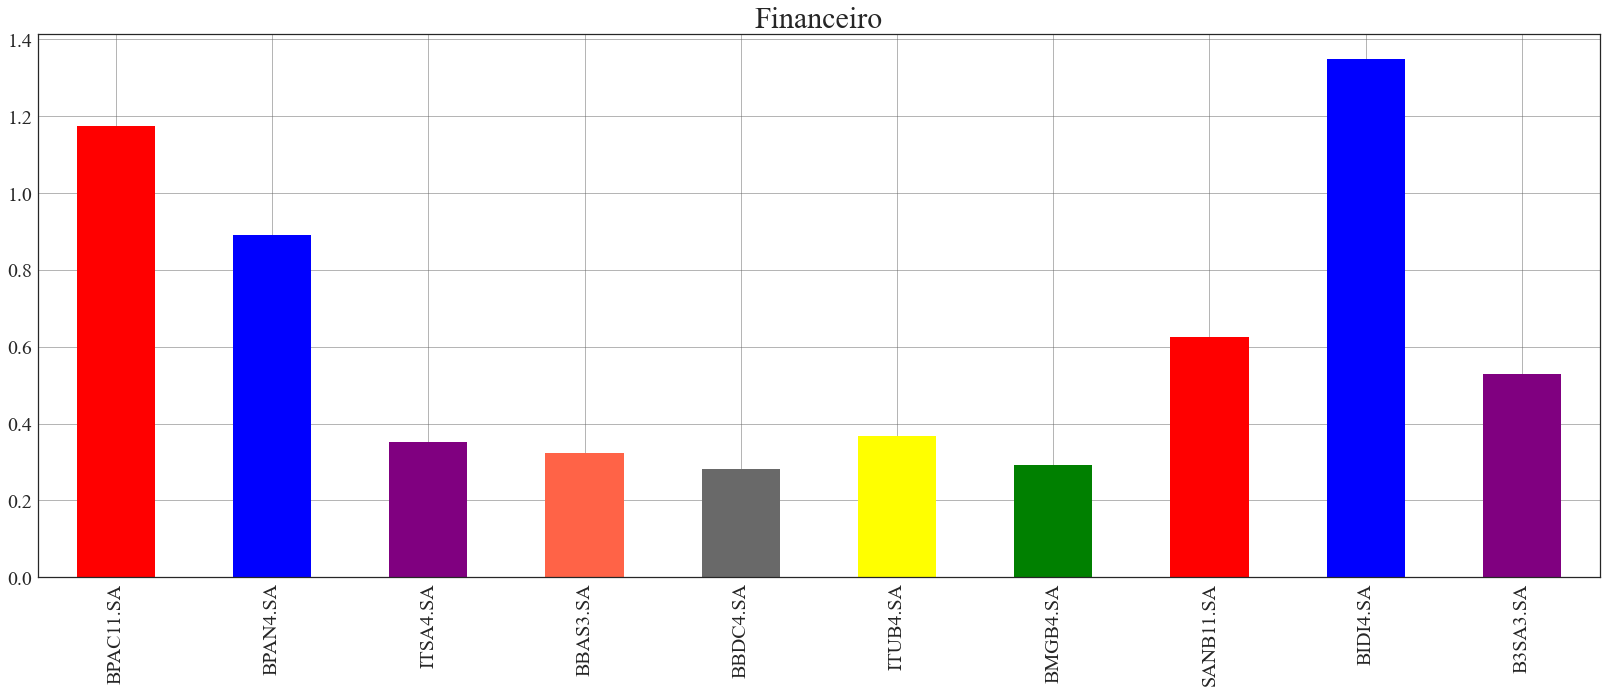

In [120]:
financeiro_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Financeiro', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

# VAR

In [121]:
financeiro_VaR.sort_values()

BIDI4.SA    -0.084331
BPAN4.SA    -0.081968
BPAC11.SA   -0.080275
SANB11.SA   -0.070922
BBDC4.SA    -0.068601
BMGB4.SA    -0.067573
BBAS3.SA    -0.067528
ITUB4.SA    -0.063182
B3SA3.SA    -0.061147
ITSA4.SA    -0.054888
dtype: float64

### Risco x Retorno

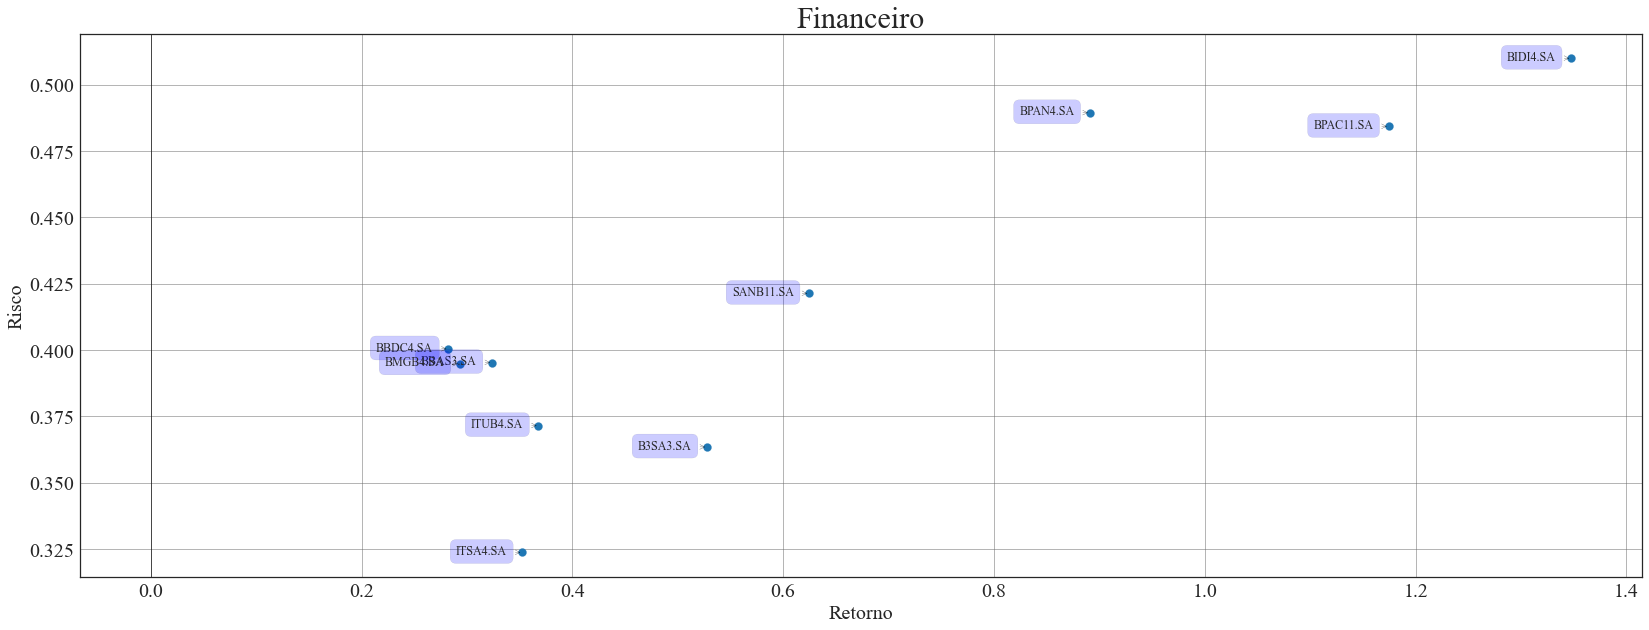

In [122]:
plt.subplots(figsize=(28,10))
plt.title('Financeiro', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(financeiro_returns, financeiro_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black', alpha = 0.6)

for label, x, y in zip(financeiro_returns.index, financeiro_returns, financeiro_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.2),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# BETA

In [123]:
# DOWNLOAD DOS DADOS DE PREÇO

FINANCEIRO  = financeiro + ['BOVA11.SA']
data        = yf.download(FINANCEIRO, start='2020-03-27')['Adj Close']

# CÁLCULO DOS RETORNOS DIÁRIOS

retornos    = np.log(data) / np.log(data.shift(1)) - 1
retornos    = retornos.fillna(0)

# CÁLCULO DO BETA

var_bench   = retornos['BOVA11.SA'].var()
covariancia = retornos.cov()['BOVA11.SA']
beta_capm   = covariancia / var_bench
beta        = pd.Series(beta_capm)

[*********************100%***********************]  11 of 11 completed


In [124]:
beta.sort_values()

BOVA11.SA    1.000000
B3SA3.SA     1.264101
BIDI4.SA     1.536852
BPAC11.SA    1.648220
ITUB4.SA     1.784041
BBAS3.SA     1.846898
SANB11.SA    1.866992
BBDC4.SA     1.942040
ITSA4.SA     2.247397
BMGB4.SA     2.483396
BPAN4.SA     3.041231
Name: BOVA11.SA, dtype: float64

[*********************100%***********************]  10 of 10 completed
Ativos com Melhor Relação em Cada Cluster: ['BIDI4.SA', 'B3SA3.SA', 'SANB11.SA']


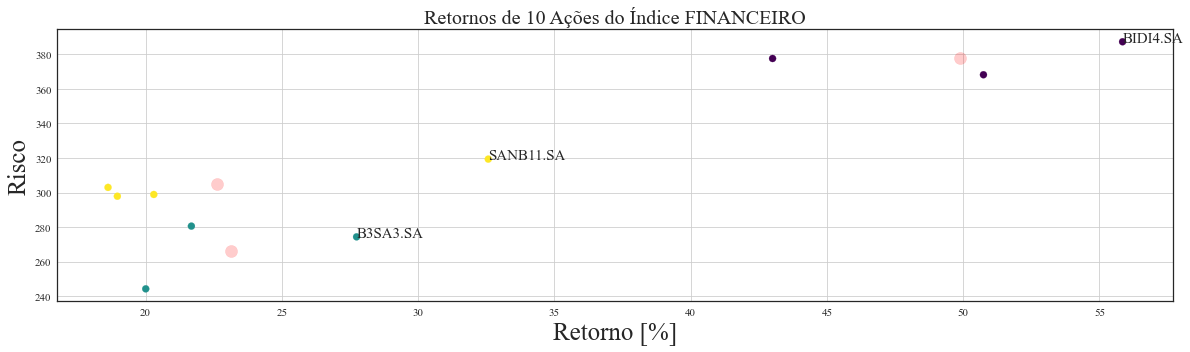

In [125]:
FINANCEIRO = financeiro 
data     = yf.download(FINANCEIRO, start='2020-03-27')['Adj Close']

output   = data
retornos = 100*output.pct_change()
stocks   = retornos.columns
X        = 100*np.array([[np.mean(retornos[sto]),np.std(retornos[sto])] for sto in stocks])
N        = 3
kmeans   = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))
ax1 = plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice FINANCEIRO',fontsize=20)
ax1.set_xlabel('Retorno [%]',fontsize=25)
ax1.set_ylabel('Risco',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)

### Correlação

[*********************100%***********************]  10 of 10 completed


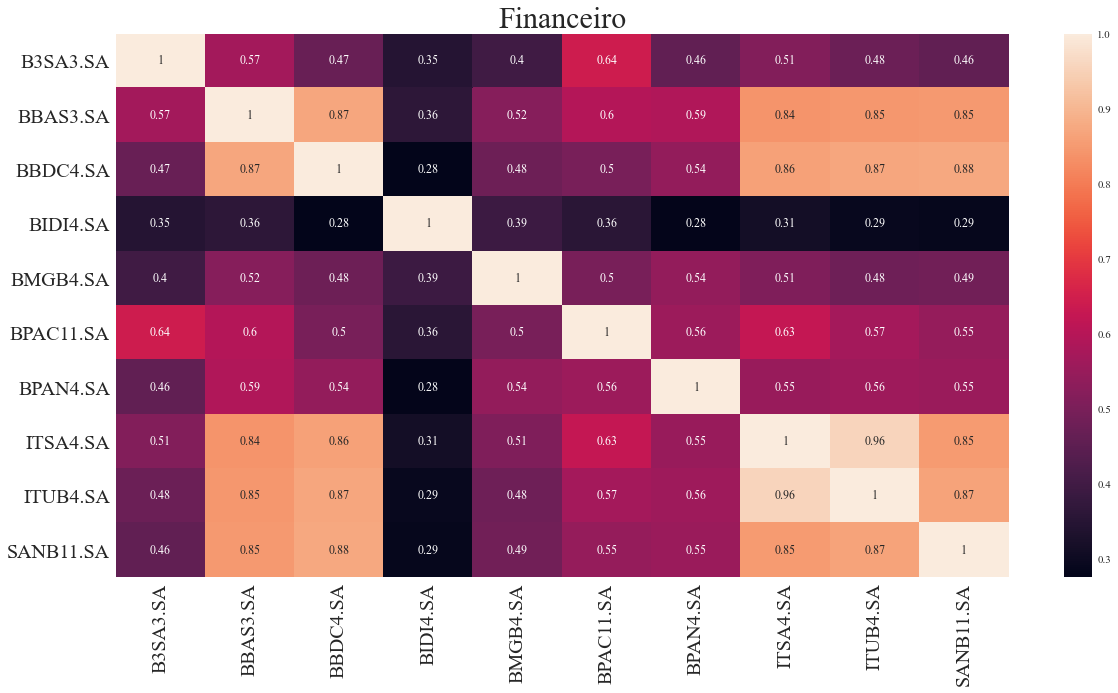

In [126]:
financeiro = financeiro
data    = yf.download(financeiro, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
financeiro_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('Financeiro', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(financeiro_daily_returns.corr(), annot=True)

# <u>***Construtoras***</u>

In [127]:
listOfReturns  = []
listOfRisks    = []
construtoras_returns = pd.Series(dtype='float64')
construtoras_risk    = pd.Series(dtype='float64')

for i in range(len(construtora)):
    data    = yf.download(construtora[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {construtora[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {construtora[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

construtoras_returns = construtoras_returns.append(listOfReturns)
construtoras_risk    = construtoras_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

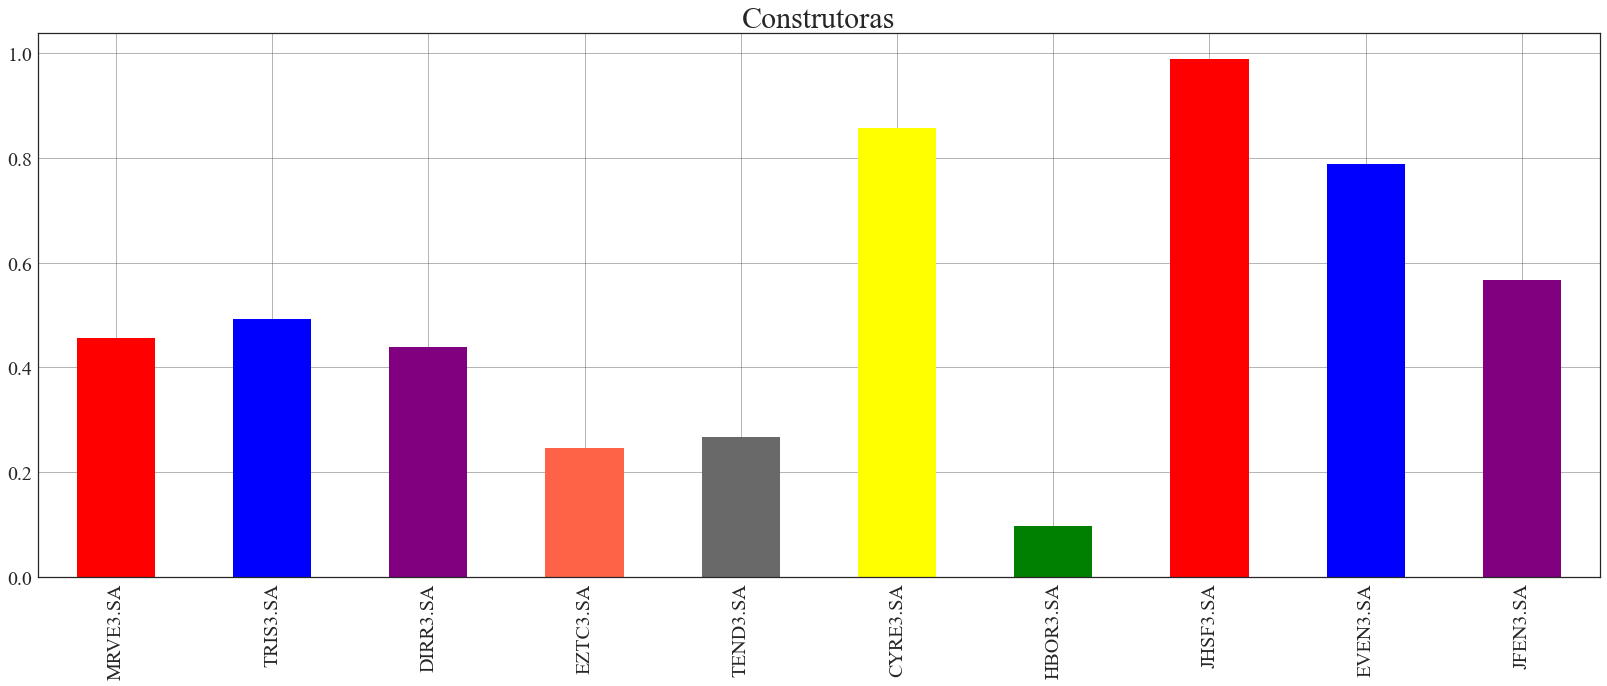

In [128]:
construtoras_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Construtoras', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

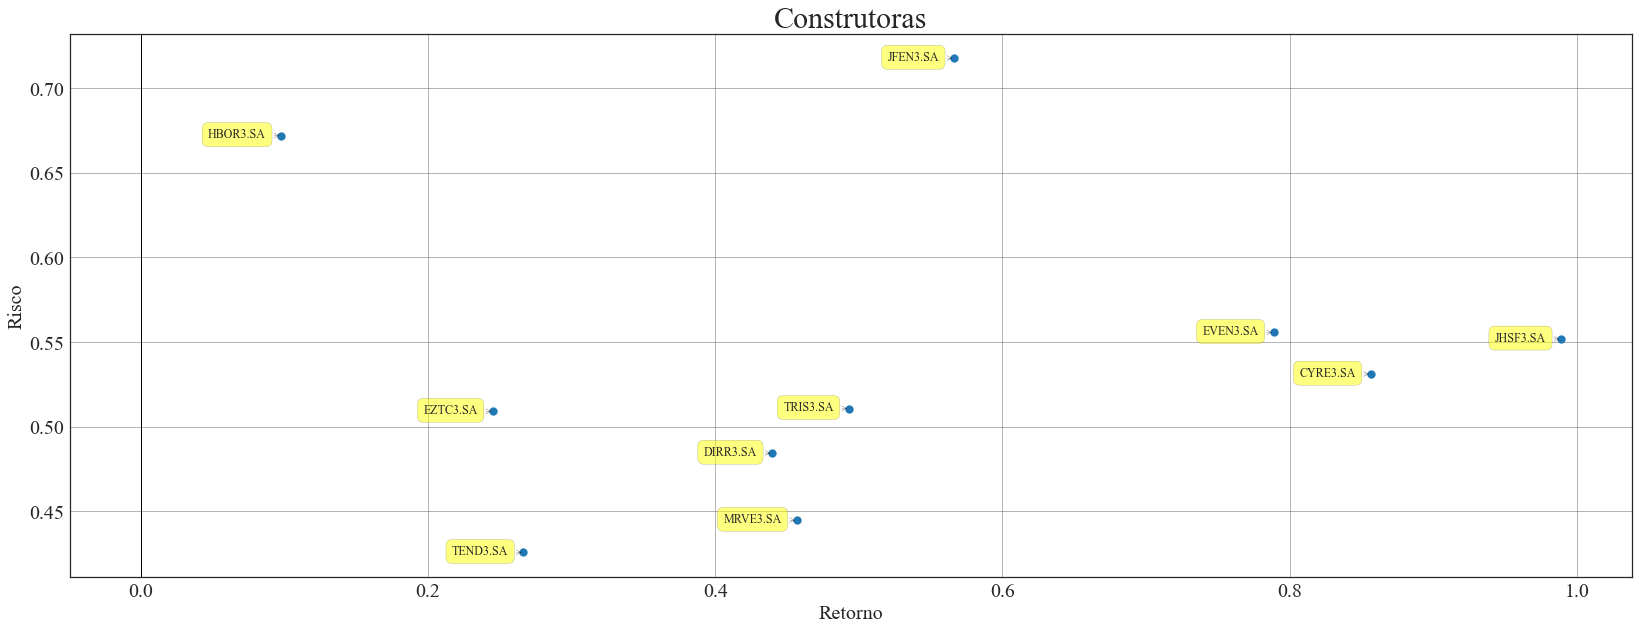

In [129]:
plt.subplots(figsize=(28,10))
plt.title('Construtoras', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(construtoras_returns, construtoras_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(construtoras_returns.index, construtoras_returns, construtoras_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  11 of 11 completed


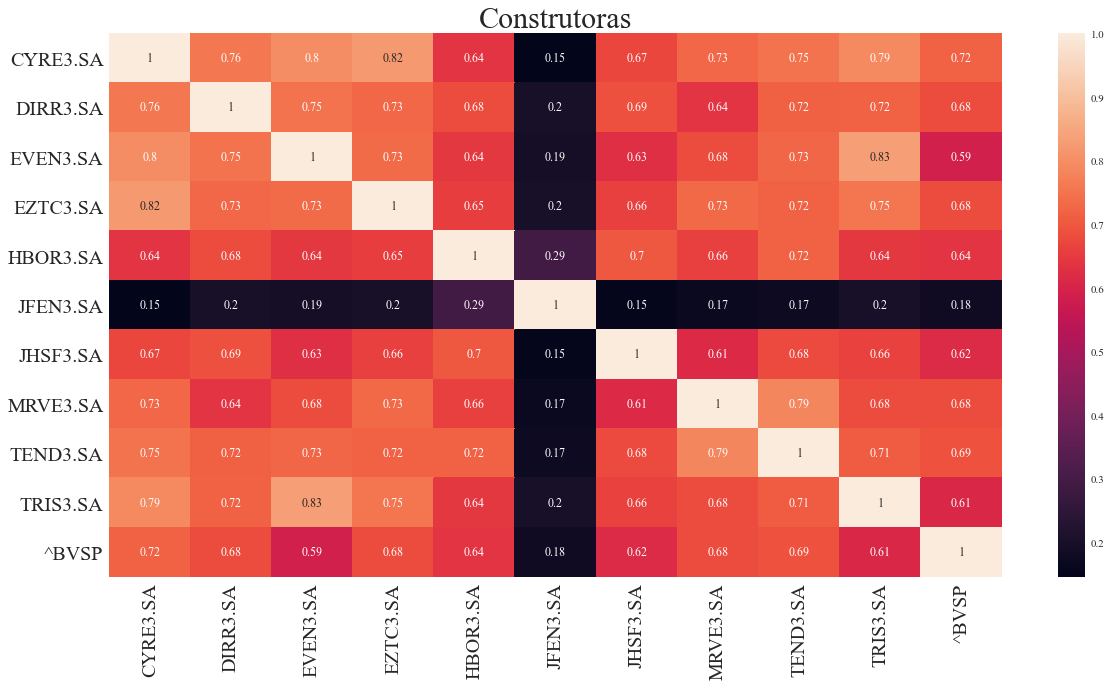

In [130]:
construtora = construtora+['^BVSP']
data    = yf.download(construtora, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
construtora_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('Construtoras', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(construtora_daily_returns.corr(), annot=True)

# <u>***Saúde***</u>

In [131]:
listOfReturns  = []
listOfRisks    = []
saude_returns = pd.Series(dtype='float64')
saude_risk    = pd.Series(dtype='float64')

for i in range(len(saude)):
    data    = yf.download(saude[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {saude[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {saude[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

saude_returns = saude_returns.append(listOfReturns)
saude_risk    = saude_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

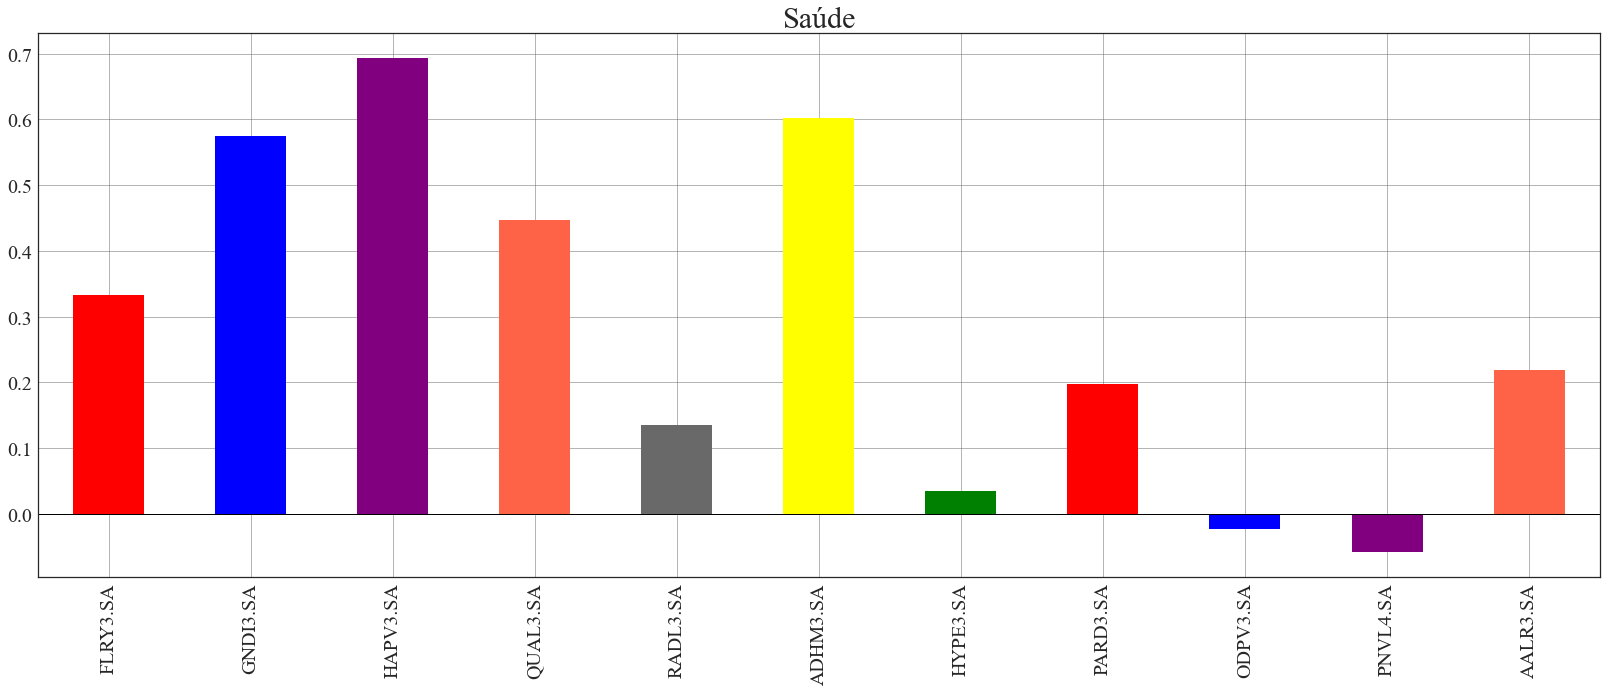

In [132]:
saude_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Saúde', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

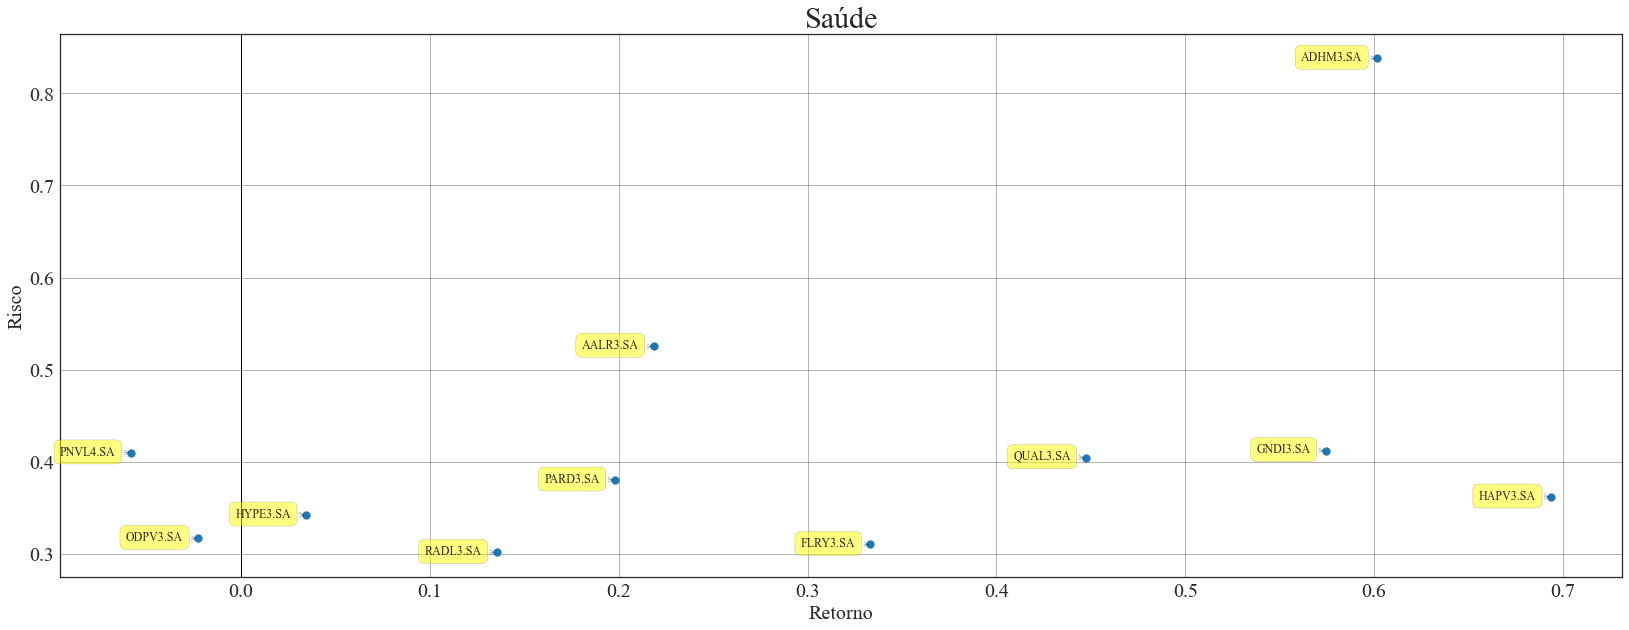

In [133]:
plt.subplots(figsize=(28,10))
plt.title('Saúde', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(saude_returns, saude_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(saude_returns.index, saude_returns, saude_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  12 of 12 completed


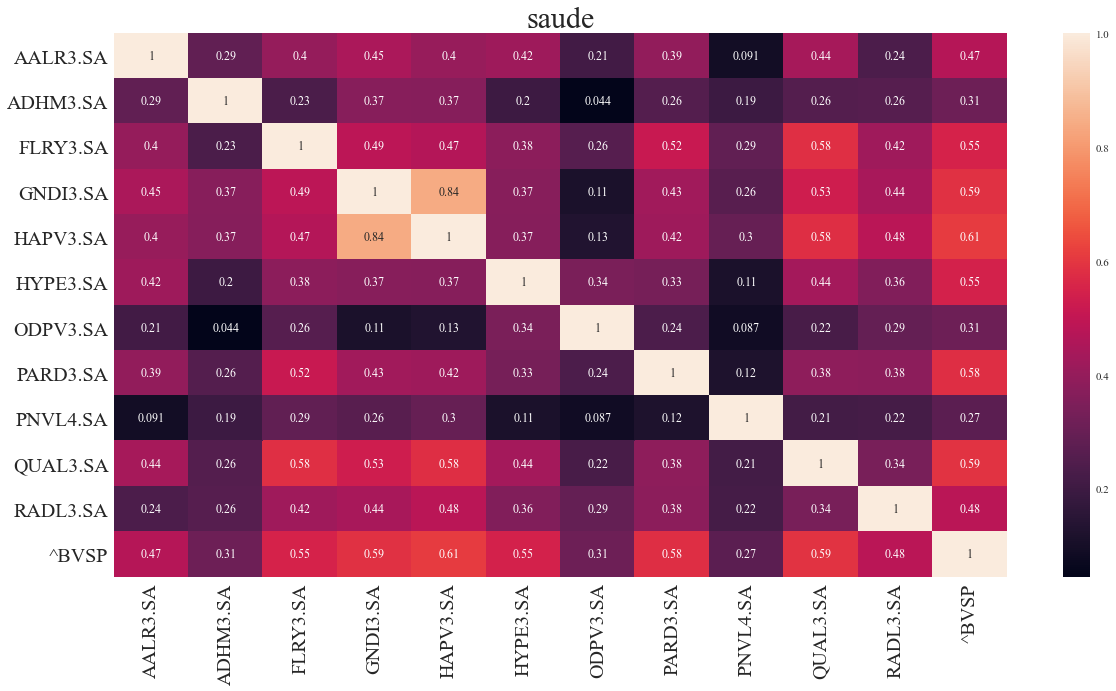

In [134]:
saude = saude+['^BVSP']
data    = yf.download(saude, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
saude_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('saude', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(saude_daily_returns.corr(), annot=True)

# <u>***Alimentos***</u>

In [135]:
listOfReturns  = []
listOfRisks    = []
alimentos_returns = pd.Series(dtype='float64')
alimentos_risk    = pd.Series(dtype='float64')

for i in range(len(alimentos)):
    data    = yf.download(alimentos[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {alimentos[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {alimentos[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

alimentos_returns = alimentos_returns.append(listOfReturns)
alimentos_risk    = alimentos_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

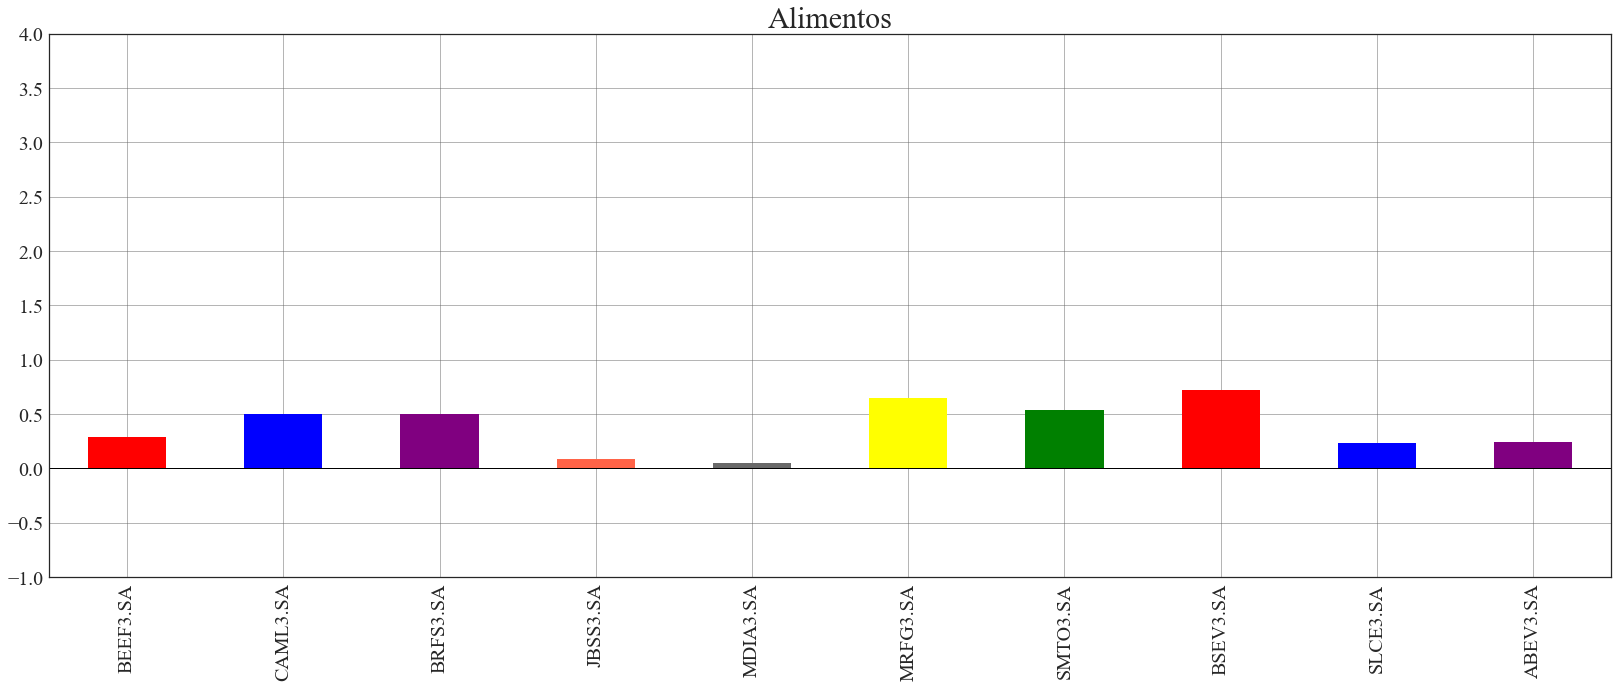

In [136]:
alimentos_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Alimentos', fontsize=30)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

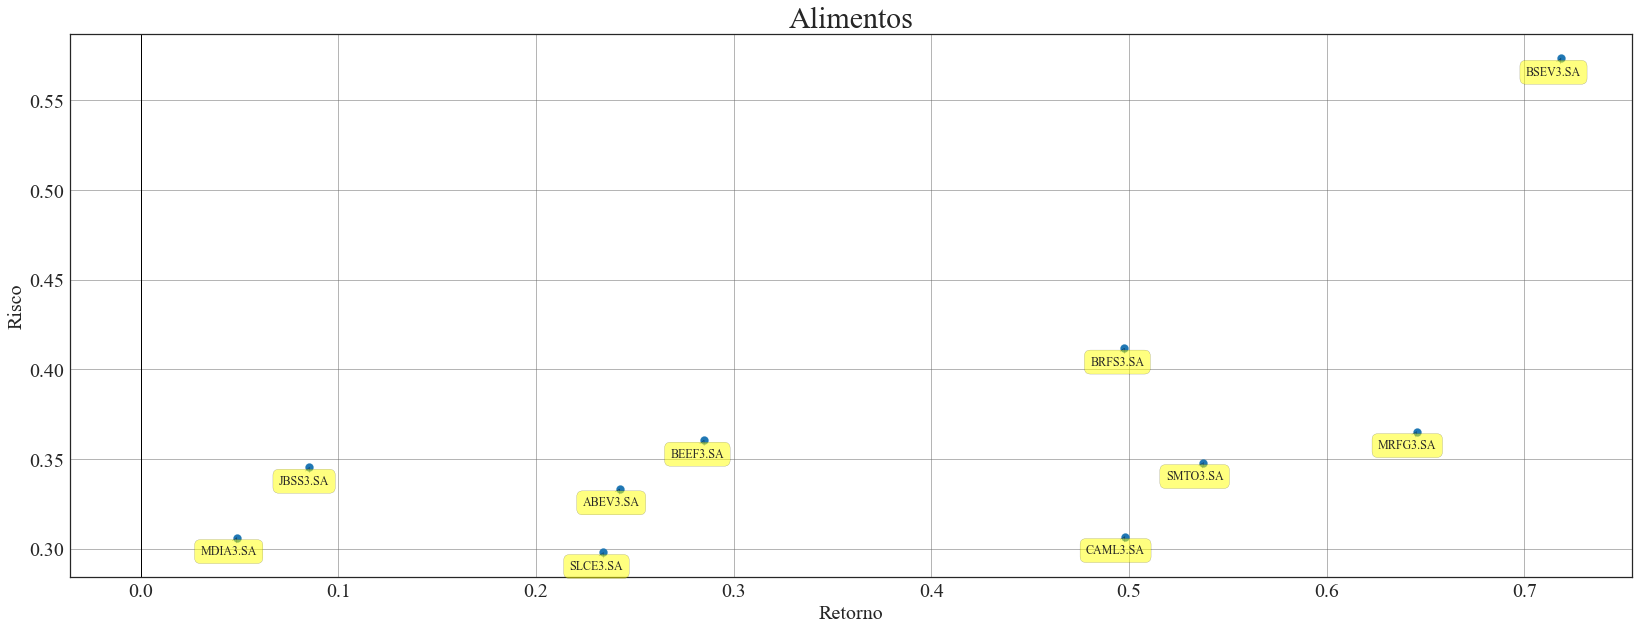

In [137]:
plt.subplots(figsize=(28,10))
plt.title('Alimentos', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(alimentos_returns, alimentos_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(alimentos_returns.index, alimentos_returns, alimentos_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Correlação

[*********************100%***********************]  11 of 11 completed


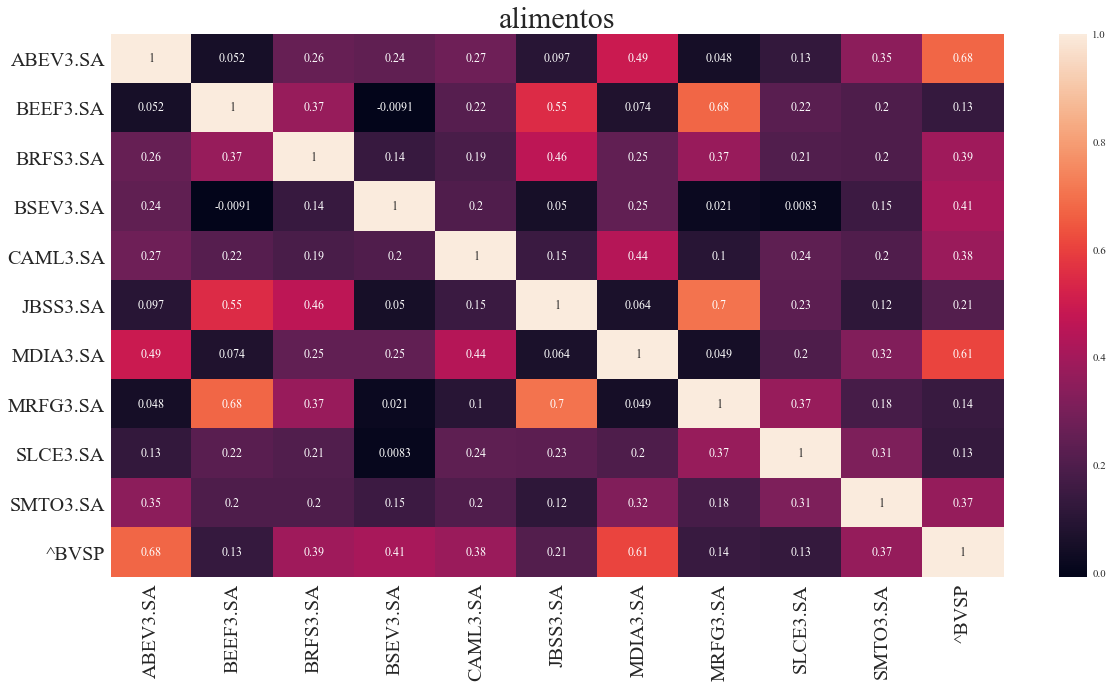

In [138]:
alimentos = alimentos+['^BVSP']
data    = yf.download(alimentos, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
alimentos_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('alimentos', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(alimentos_daily_returns.corr(), annot=True)

# <u>***Energia***</u>

In [139]:
listOfReturns  = []
listOfRisks    = []
energia_returns = pd.Series(dtype='float64')
energia_risk    = pd.Series(dtype='float64')

for i in range(len(energia)):
    data    = yf.download(energia[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {energia[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {energia[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

energia_returns = energia_returns.append(listOfReturns)
energia_risk    = energia_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retorno

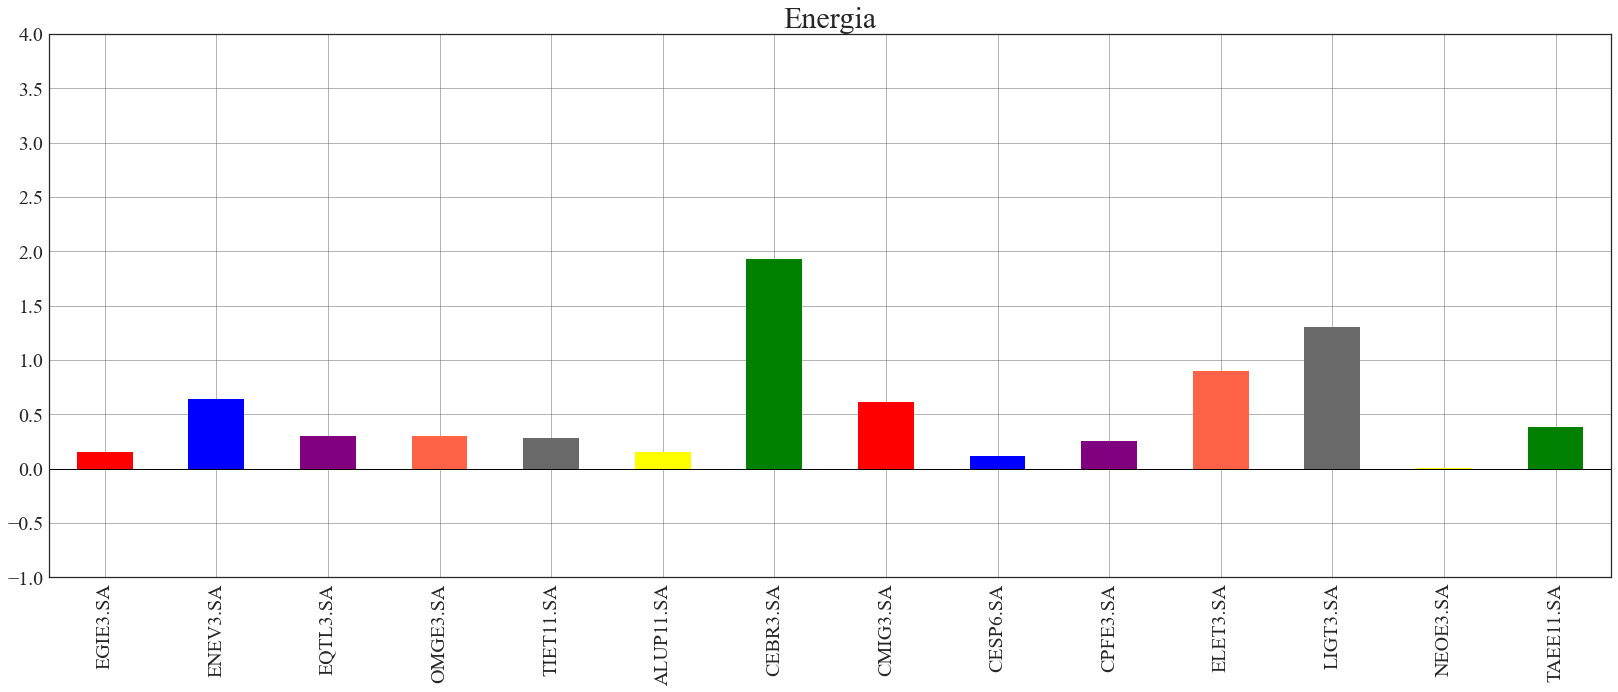

In [140]:
energia_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Energia', fontsize=30)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

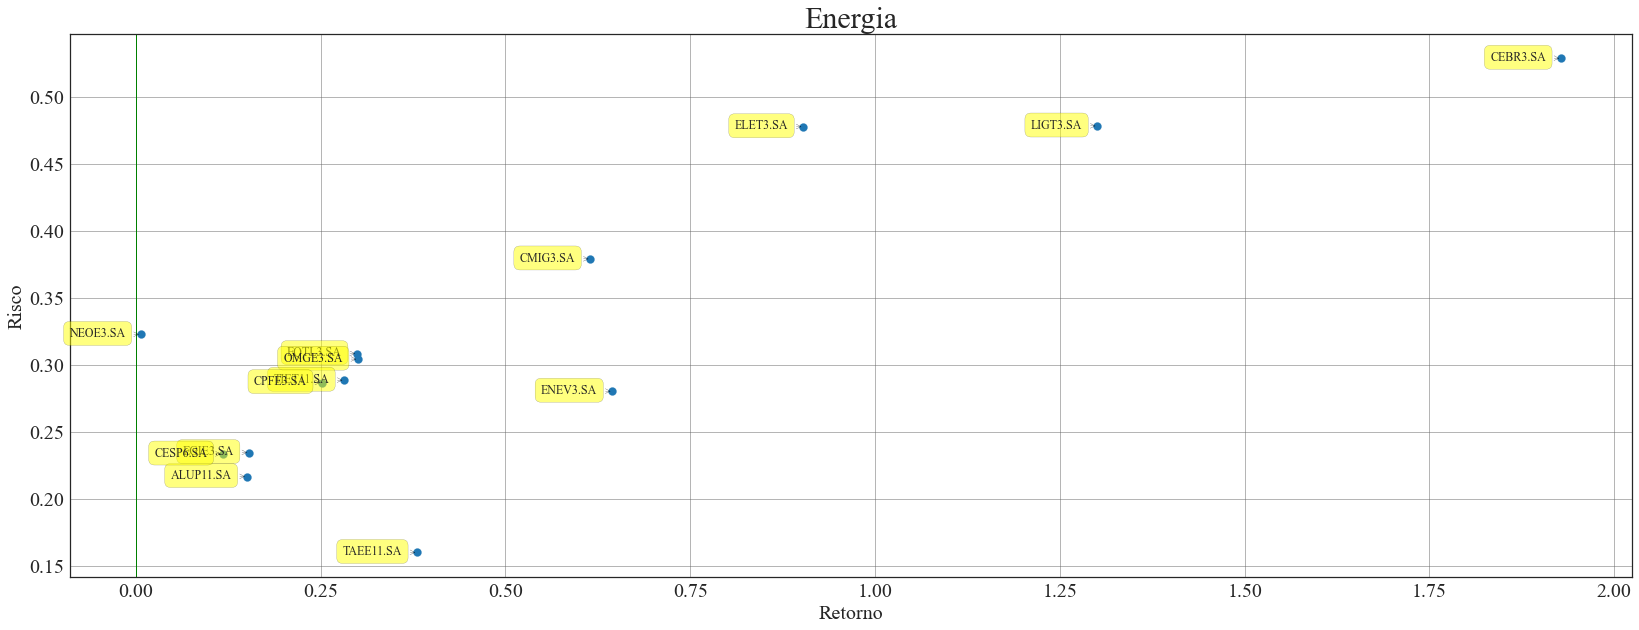

In [141]:
plt.subplots(figsize=(28,10))
plt.title('Energia', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(energia_returns, energia_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='green')

for label, x, y in zip(energia_returns.index, energia_returns, energia_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (-15, -5),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

[*********************100%***********************]  15 of 15 completed


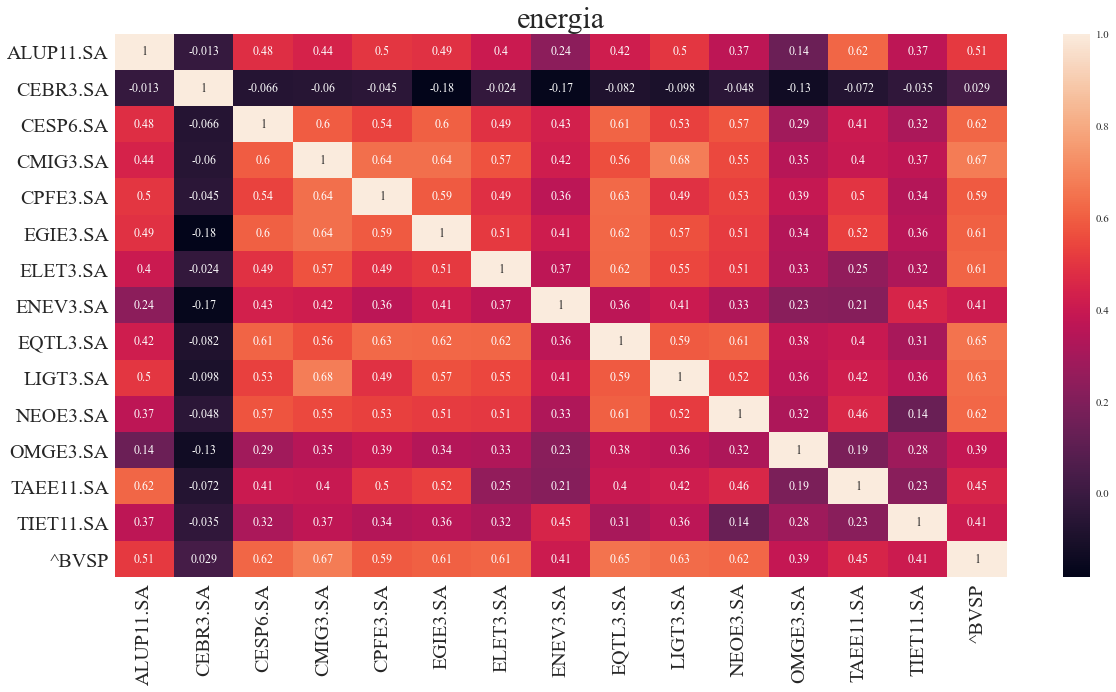

In [142]:
energia = energia+['^BVSP']
data    = yf.download(energia, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
energia_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('energia', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(energia_daily_returns.corr(), annot=True)

# <u>***Tecnologia***</u>

In [153]:
listOfReturns  = []
listOfRisks    = []
tecnologia_returns = pd.Series(dtype='float64')
tecnologia_risk    = pd.Series(dtype='float64')

for i in range(len(tecnologia)):
    data    = yf.download(tecnologia[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {tecnologia[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {tecnologia[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

tecnologia_returns = tecnologia_returns.append(listOfReturns)
tecnologia_risk    = tecnologia_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Retornos

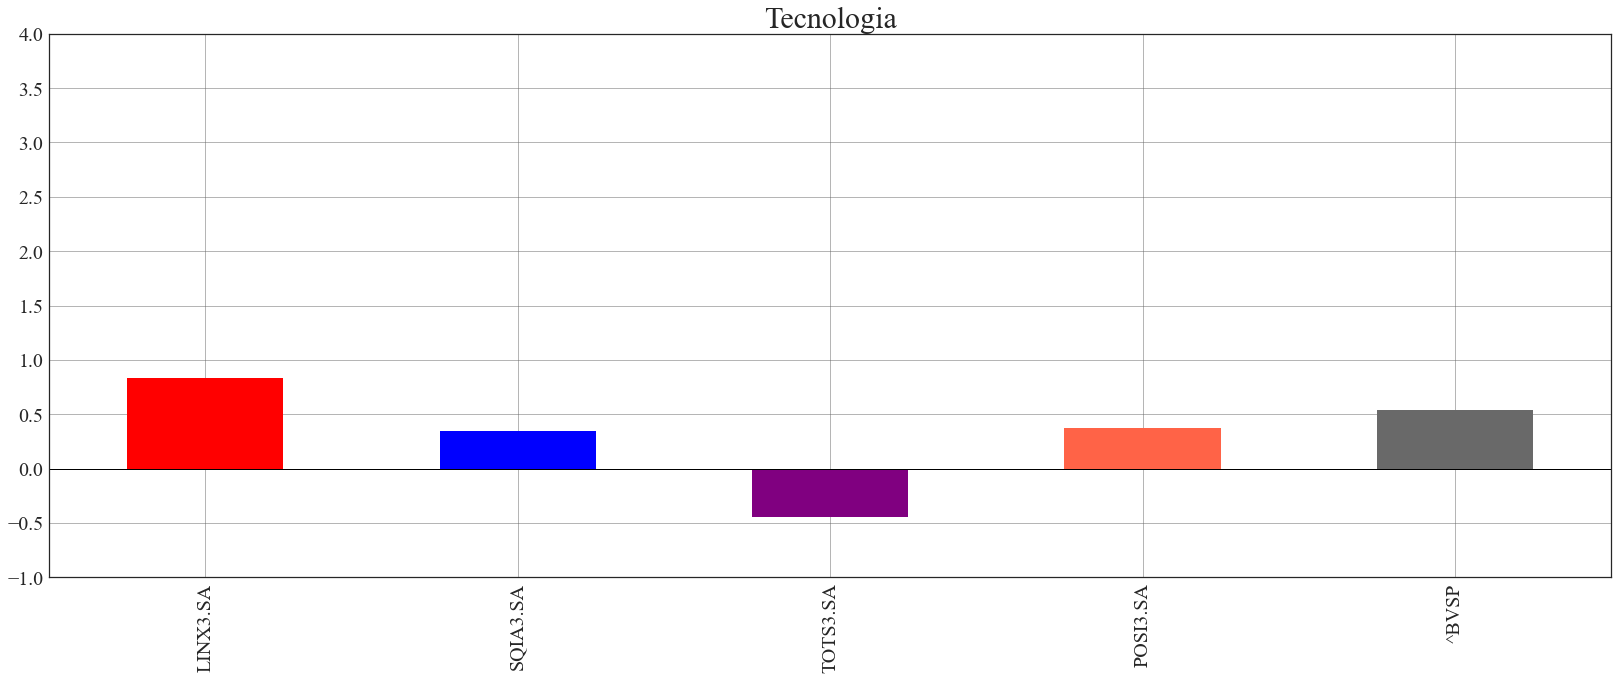

In [154]:
tecnologia_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Tecnologia', fontsize=30)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno

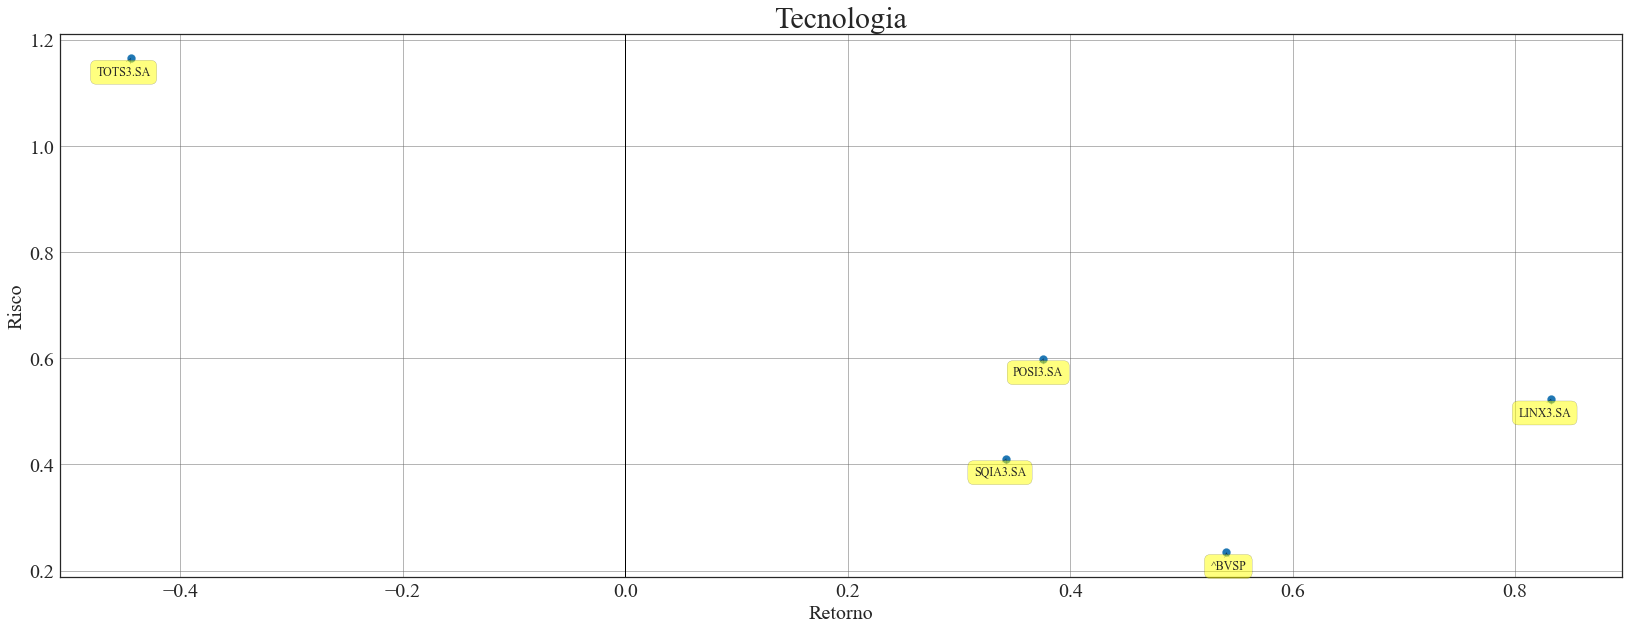

In [155]:
plt.subplots(figsize=(28,10))
plt.title('Tecnologia', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(tecnologia_returns, tecnologia_risk)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(tecnologia_returns.index, tecnologia_returns, tecnologia_risk):
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  5 of 5 completed


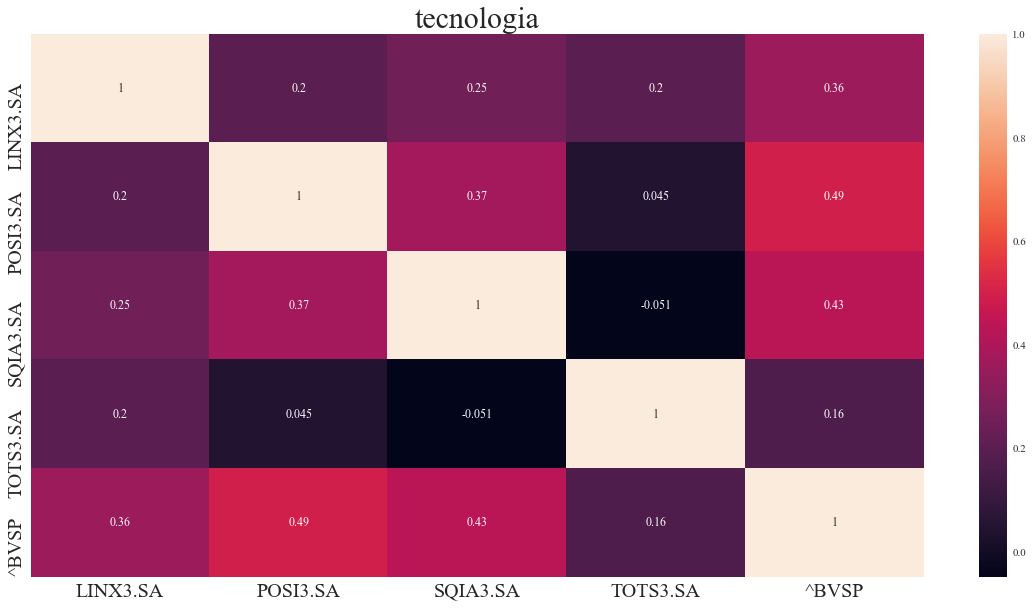

In [156]:
tecnologia = tecnologia+['^BVSP']
data    = yf.download(tecnologia, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
tecnologia_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('tecnologia', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(tecnologia_daily_returns.corr(), annot=True)

# <u>***Materiais***</u>

In [147]:
listOfReturns  = []
listOfRisks    = []
materiais_returns = pd.Series(dtype='float64')
materiais_risk    = pd.Series(dtype='float64')

for i in range(len(materiais)):
    data    = yf.download(materiais[i], start='2020-03-27')['Adj Close']
    data.ffill(inplace=True)
    
    returns           = np.log(data).shift(-1) - np.log(data)
    annual_returns    = ((1+np.mean(returns))**len(data))-1
    dictionary_return = {materiais[i] : annual_returns}
    series_return     = pd.Series(dictionary_return)
    listOfReturns.append(series_return)
    
    risk              = np.std(returns) * np.sqrt(len(data))
    dictionary_risk   = {materiais[i] : risk}
    series_risk       = pd.Series(dictionary_risk)
    listOfRisks.append(series_risk)

materiais_returns = materiais_returns.append(listOfReturns)
materiais_risk    = materiais_risk.append(listOfRisks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Retorno

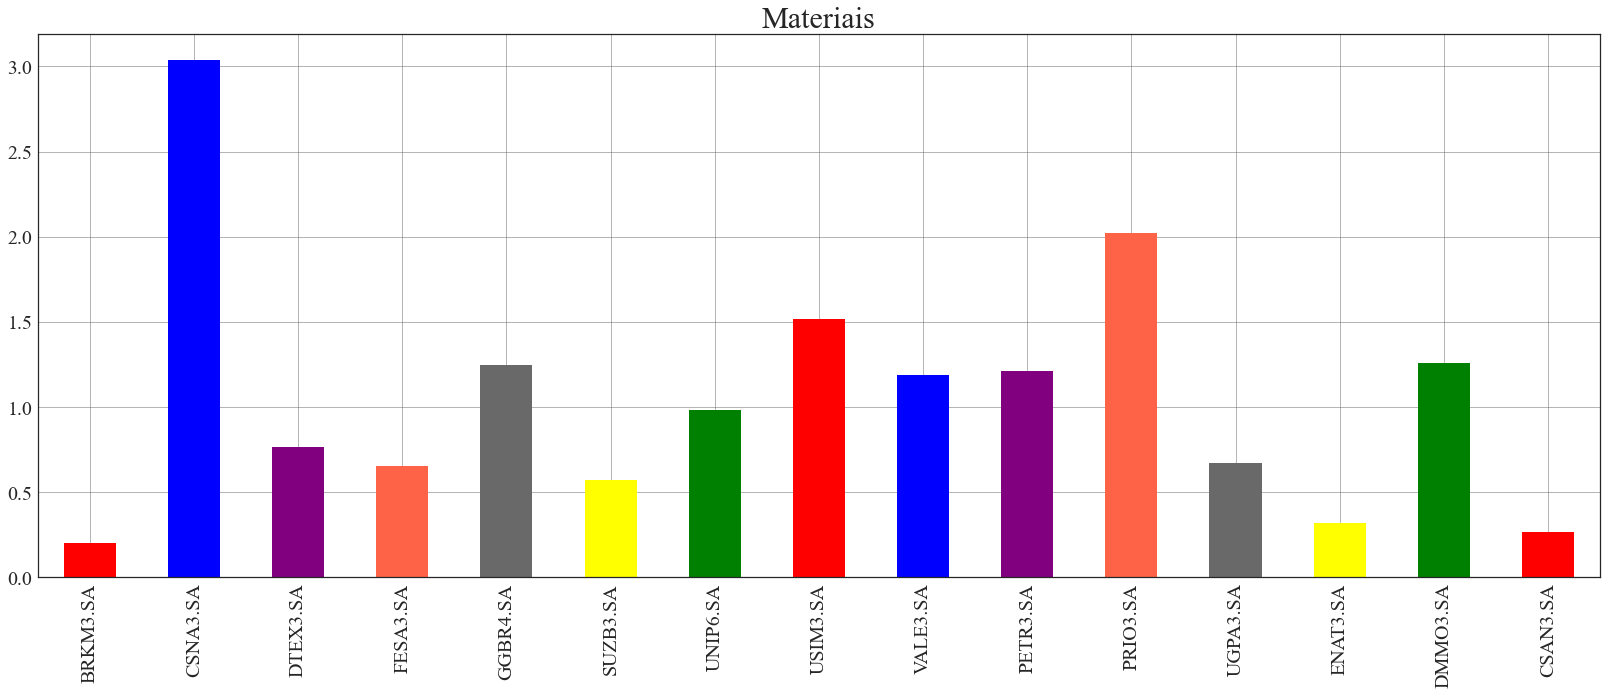

In [148]:
materiais_returns.plot.bar(figsize=(28,10), color=['red','blue','purple', 'tomato', 'dimgray', 'yellow', 'green'], fontsize=15)
plt.title('Materiais', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.axhline(y=0, color='black')

### Risco x Retorno 

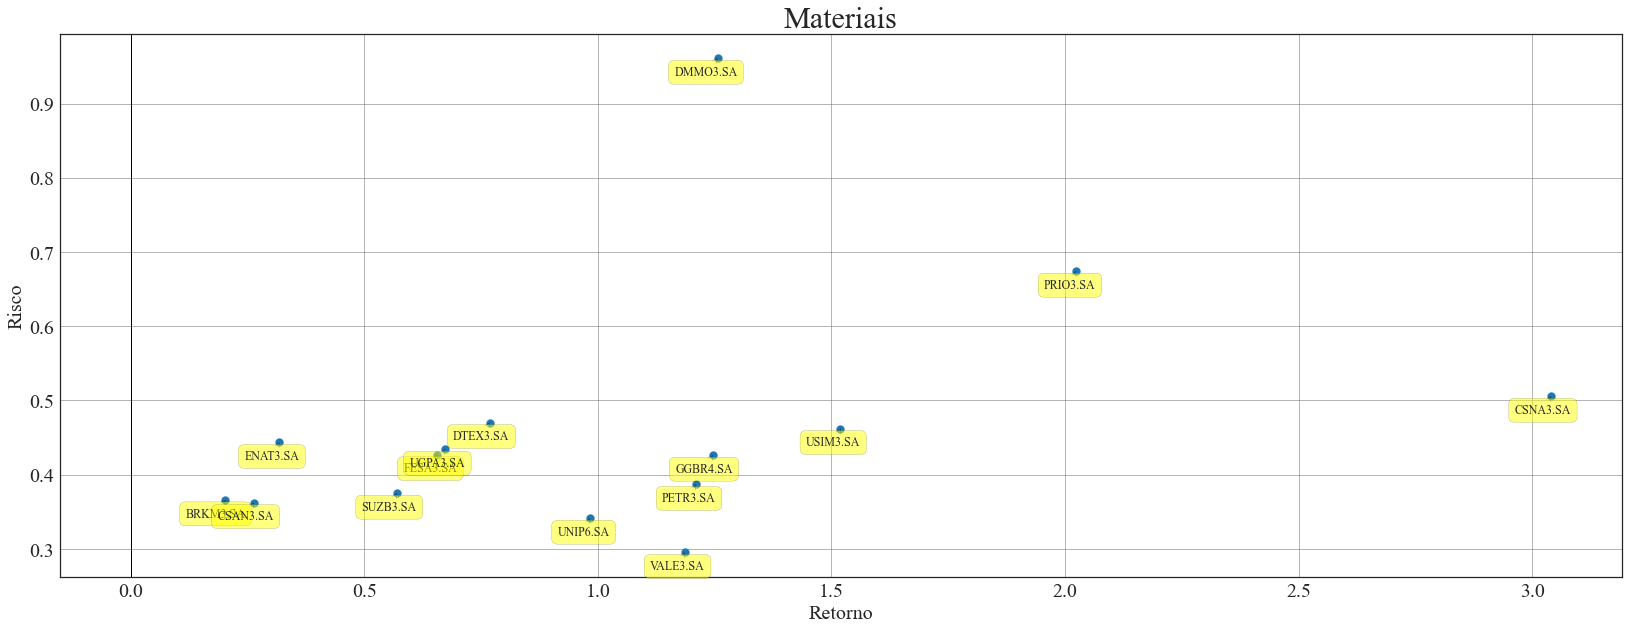

In [149]:
plt.subplots(figsize=(28,10))

plt.title('Materiais', fontsize=30)

plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)

plt.scatter(materiais_returns, materiais_risk)

plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(x=0, color='black')

for label, x, y in zip(materiais_returns.index, materiais_returns, materiais_risk):
    
    plt.annotate(label, 
                 xy = (x, y), xytext = (20, -20),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Correlação

[*********************100%***********************]  16 of 16 completed


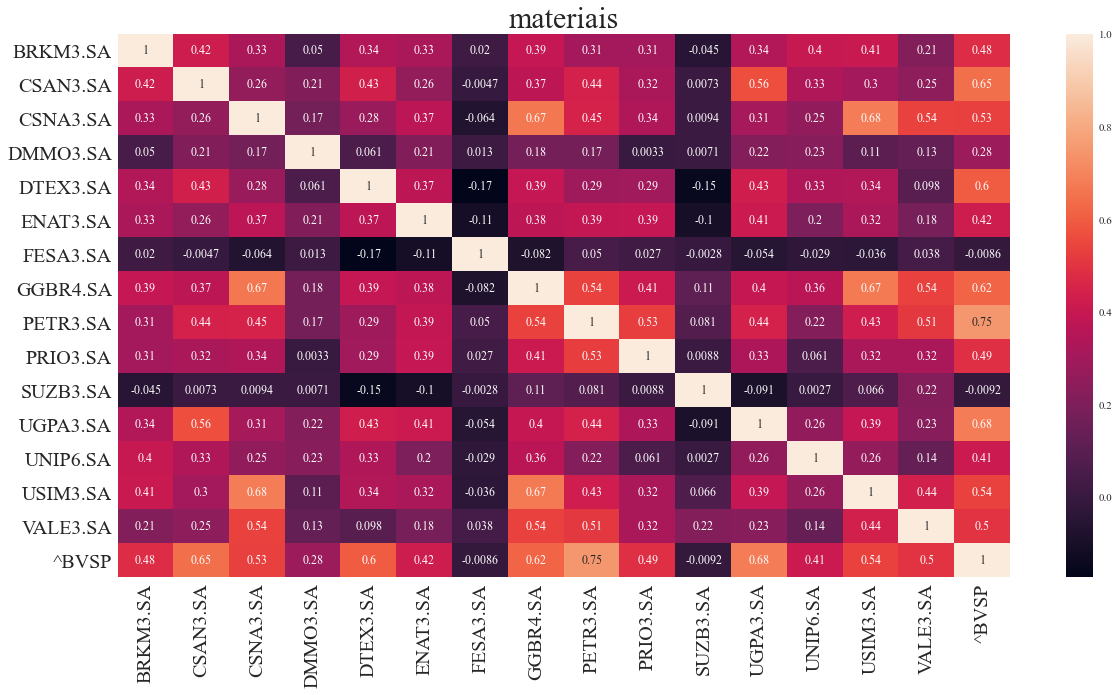

In [150]:
materiais = materiais+['^BVSP']
data    = yf.download(materiais, start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
materiais_daily_returns = np.log(data).shift(-1) - np.log(data)

plt.subplots(figsize=(20,10))
plt.title('materiais', fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.heatmap(materiais_daily_returns.corr(), annot=True)

# <u>***Risco x Retorno dos Setores***</u>

In [151]:
bvsp_data    = yf.download('^BVSP', start='2020-03-27')['Adj Close']
data.ffill(inplace=True)
    
diversos_daily_returns = np.log(data).shift(-1) - np.log(data)

[*********************100%***********************]  1 of 1 completed


In [157]:
dict2     = {'Varejo'     : varejo_returns.mean(), 
            'Financeiro'  : financeiro_returns.mean(),
            'Construtoras': construtoras_returns.mean(),
            'Saude'       : saude_returns.mean(),
            'Alimentos'   : alimentos_returns.mean(),
            'Energia'     : energia_returns.mean(),
            'Tecnologia'  : tecnologia_returns.mean(),
            'Materiais'   : materiais_returns.mean()}

dict1    = {'Varejo'      : varejo_risk.mean(), 
            'Financeiro'  : financeiro_risk.mean(),
            'Construtoras': construtoras_risk.mean(),
            'Saude'       : saude_risk.mean(),
            'Alimentos'   : alimentos_risk.mean(),
            'Energia'     : energia_risk.mean(),
            'Tecnologia'  : tecnologia_risk.mean(),
            'Materiais'   : materiais_risk.mean()}

setores_return = pd.Series(dict2)
setores_risk   = pd.Series(dict1)

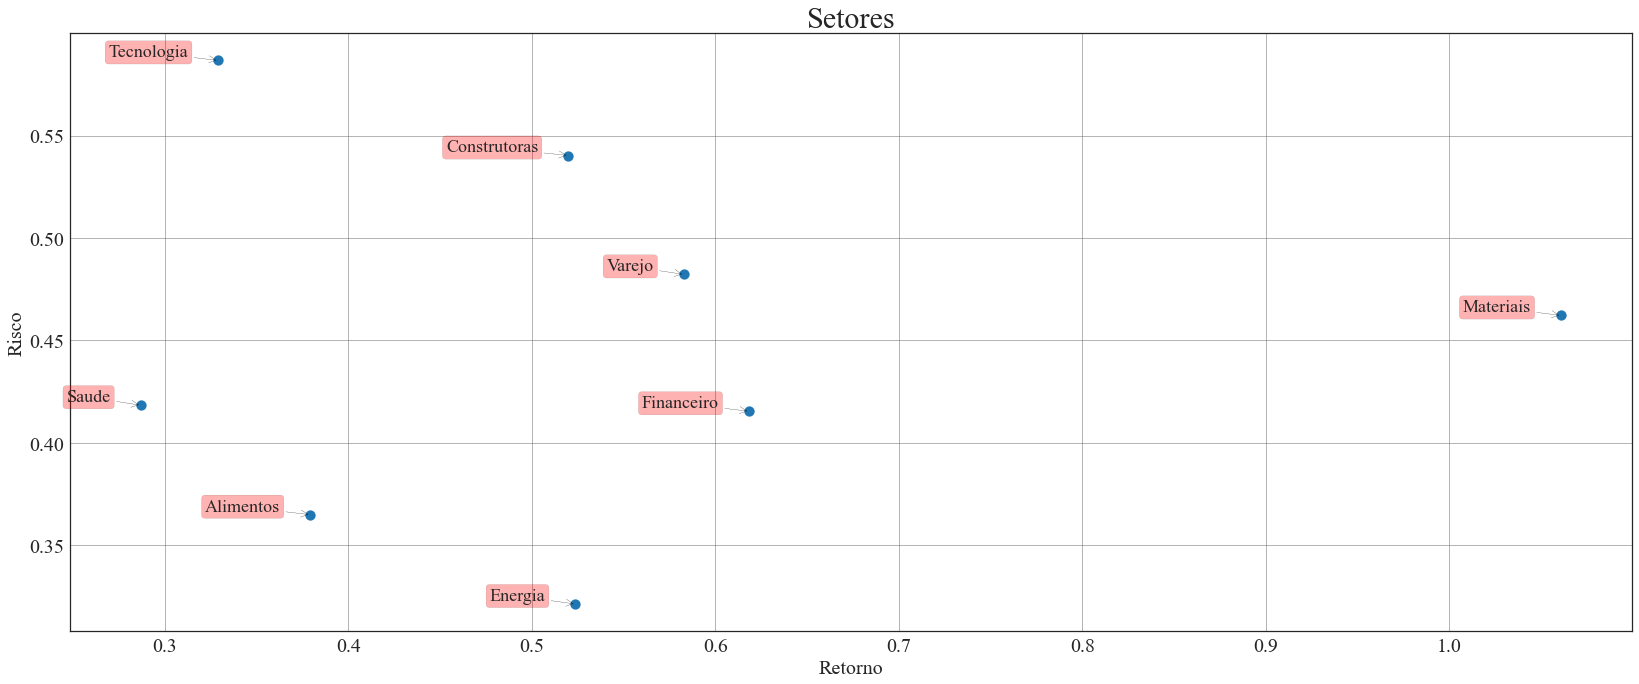

In [158]:
plt.subplots(figsize=(28,11))
plt.title('Setores', fontsize=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.scatter(setores_return, setores_risk, s=100)
plt.xlabel('Retorno', fontsize=20)
plt.ylabel('Risco', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)

for label, x, y in zip(setores_return.index, setores_return, setores_risk):
    plt.annotate(label, fontsize=18, 
                 xy = (x, y), xytext = (-30, 0),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 bbox = dict(boxstyle = 'round,pad=0.2', fc = 'red', alpha = 0.3),
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# <u>***Carteira***</u>

In [159]:
carteira_data = yf.download('BBDC4.SA BPAC11.SA CSNA3.SA MGLU3.SA JHSF3.SA', start='2020-03-27')['Adj Close']
data.ffill(inplace=True)

[*********************100%***********************]  5 of 5 completed


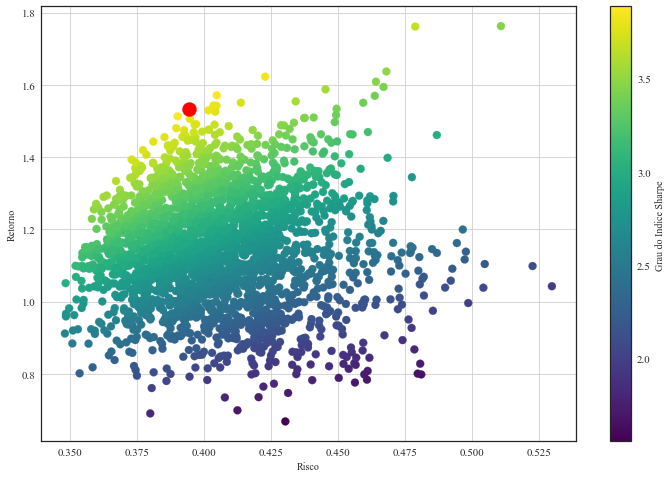

In [161]:
import random

# Markowits

log_ret = np.log(carteira_data / carteira_data.shift(1))

# Admite que a mesma sequencia randomica
np.random.seed(42)
num_ports = 2500
all_weights = np.zeros((num_ports, len(carteira_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(carteira_data.columns)))
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

# Para operar na venda utilize o agrmin()
maximo = sharpe_arr.argmax()
#maximo = sharpe_arr.argmin()

          

max_sr_ret = ret_arr[maximo]
max_sr_vol = vol_arr[maximo]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Grau do Indice Sharpe ')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) # red dot
plt.show()

In [162]:
# Fator expectativa
exp = (max_sr_ret - max_sr_vol)/(max_sr_ret + max_sr_vol)
expec_real = 1 +(exp/100)
# exp = expec_real**252d

print("Expectativa de retorno diário:   %.3f" % exp + " %")

Expectativa de retorno diário:   0.591 %


In [164]:
all_weights[maximo]

array([0.04501108, 0.0697258 , 0.43021729, 0.01693251, 0.43811332])